# Modelos para la predicción de energía electrica

1. Cargo los datos tranformados en el notebook exploración de datos.
2. Exploro las variables a utilizar en los modelos.
3. Modelo base de partida.
4. Decision Tree.
5. Random Forest.
6. Gradient Boosting Trees.
7. Comparación de modelos.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 6)

### 1 - Datos:

In [4]:
datos = pd.read_csv('datos_finales.csv', parse_dates = ['datetime'], index_col = 'datetime')
datos.index = pd.DatetimeIndex(datos.index).to_period('H')

In [5]:
datos

,datetime_utc,demanda_electrica,tmed,minutos_luz,hora,nombre_mes,dia_semana,festivo,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,April,May,June,July,August,September,October,November,December,fecha,año,mes,dia
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00,2016-01-01 00:00:00+01:00,487.174,12.4,566,0,January,Friday,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016,1,1
2016-01-01 01:00,2016-01-01 01:00:00+01:00,459.223,12.4,566,1,January,Friday,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016,1,1
2016-01-01 02:00,2016-01-01 02:00:00+01:00,428.181,12.4,566,2,January,Friday,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016,1,1
2016-01-01 03:00,2016-01-01 03:00:00+01:00,400.044,12.4,566,3,January,Friday,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016,1,1
2016-01-01 04:00,2016-01-01 04:00:00+01:00,379.334,12.4,566,4,January,Friday,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00,2019-12-31 19:00:00+01:00,845.089,10.2,565,19,December,Tuesday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2019-12-31,2019,12,31
2019-12-31 20:00,2019-12-31 20:00:00+01:00,801.779,10.2,565,20,December,Tuesday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2019-12-31,2019,12,31
2019-12-31 21:00,2019-12-31 21:00:00+01:00,709.272,10.2,565,21,December,Tuesday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2019-12-31,2019,12,31


De éste dataframe, me voy a quedar con las variables que finalmente voy a utilizar:
- La variable objetivo, es decir, la variable que voy a tratar de predecir es 'demanda_electrica', que representa la energía eléctrica demandada en Islas Baleares en MW/h con frecuencia horaria.
- La features finalmente serán:
        - tmed: temperatura media diaria y que será común para todas las horas de un mismo día.
        - minutos_luz: minutos para cada día entre la salida y puesta de sol.
        - hora: hora del día.
        - festivo: variable que indica si el día es festivo (1) o no (0).
        - Cada uno de los días de la semana: Toma el valor 1 cuando se corresponde a ese día y 0 en caso contrario.

In [6]:
datos[['demanda_electrica', 'tmed', 'minutos_luz', 'festivo', 'hora',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

,demanda_electrica,tmed,minutos_luz,festivo,hora,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
datetime,,,,,,,,,,,,
2016-01-01 00:00,487.174,12.4,566,1,0,0,0,0,0,1,0,0
2016-01-01 01:00,459.223,12.4,566,1,1,0,0,0,0,1,0,0
2016-01-01 02:00,428.181,12.4,566,1,2,0,0,0,0,1,0,0
2016-01-01 03:00,400.044,12.4,566,1,3,0,0,0,0,1,0,0
2016-01-01 04:00,379.334,12.4,566,1,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00,845.089,10.2,565,0,19,0,1,0,0,0,0,0
2019-12-31 20:00,801.779,10.2,565,0,20,0,1,0,0,0,0,0
2019-12-31 21:00,709.272,10.2,565,0,21,0,1,0,0,0,0,0


### 2 - Exploración de las variables:
Graficos y correlaciones entre variables numéricas

In [7]:
datos_num = datos[['demanda_electrica', 'tmed', 'minutos_luz', 'hora']]
datos_num

,demanda_electrica,tmed,minutos_luz,hora
datetime,,,,
2016-01-01 00:00,487.174,12.4,566,0
2016-01-01 01:00,459.223,12.4,566,1
2016-01-01 02:00,428.181,12.4,566,2
2016-01-01 03:00,400.044,12.4,566,3
2016-01-01 04:00,379.334,12.4,566,4
...,...,...,...,...
2019-12-31 19:00,845.089,10.2,565,19
2019-12-31 20:00,801.779,10.2,565,20
2019-12-31 21:00,709.272,10.2,565,21


In [8]:
datos_num.corr()

,demanda_electrica,tmed,minutos_luz,hora
demanda_electrica,1.000000,0.559286,0.427849,0.527520
tmed,0.559286,1.000000,0.708039,-0.000064
minutos_luz,0.427849,0.708039,1.000000,0.000151
hora,0.527520,-0.000064,0.000151,1.000000


In [9]:
import seaborn as sns

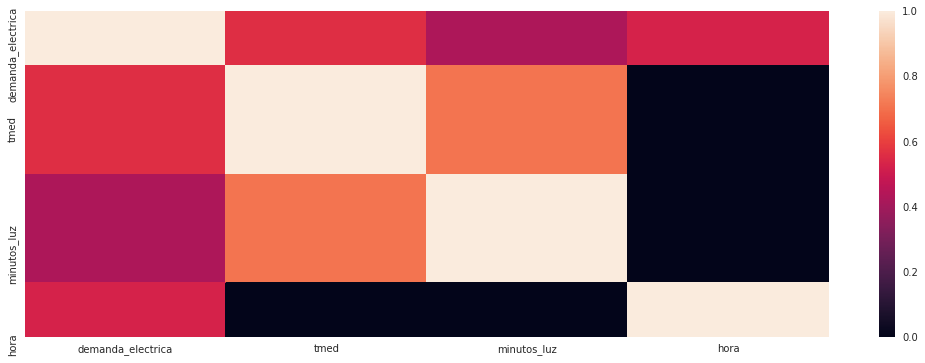

In [10]:
sns.heatmap(datos_num.corr())

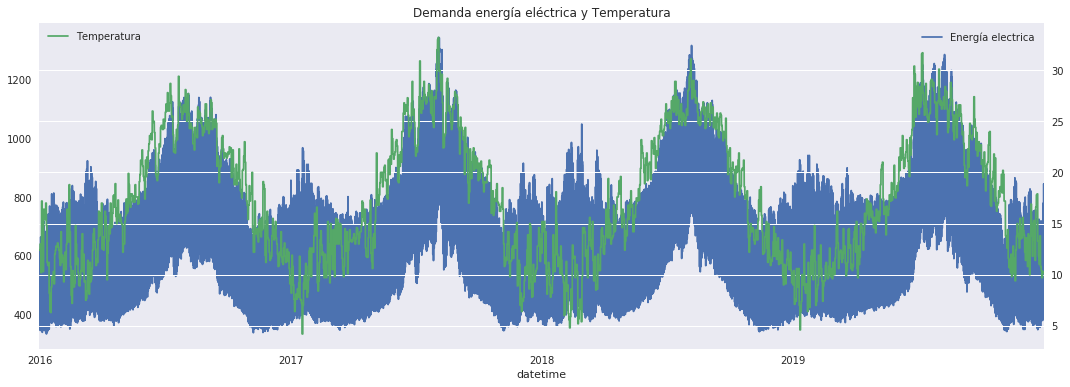

In [11]:
datos['demanda_electrica'].plot()
plt.legend(['Energía electrica'], loc = 2)
datos['tmed'].plot(secondary_y = True)
plt.legend(['Temperatura'], loc = 2)
plt.title('Demanda energía eléctrica y Temperatura');

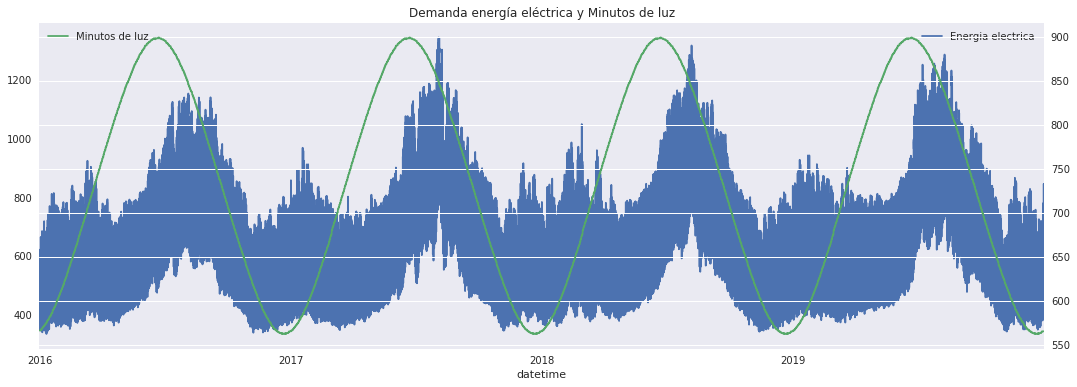

In [12]:
datos['demanda_electrica'].plot()
plt.legend(['Energia electrica'], loc = 2)
datos['minutos_luz'].plot(secondary_y = True)
plt.legend(['Minutos de luz'], loc = 2)
plt.title('Demanda energía eléctrica y Minutos de luz');

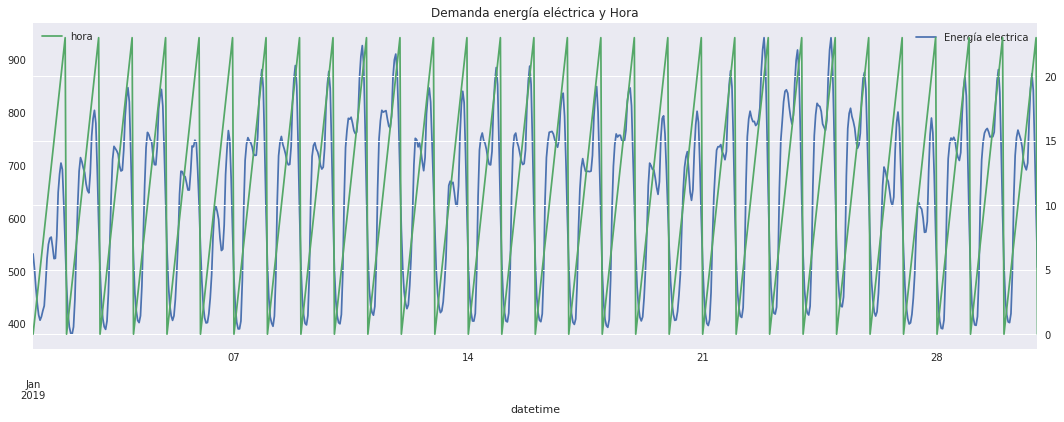

In [13]:
datos['demanda_electrica'].truncate('2019-01-01', '2019-01-31').plot()
plt.legend(['Energía electrica'], loc = 2)
datos['hora'].truncate('2019-01-01', '2019-01-31').plot(secondary_y = True)
plt.legend(['hora'], loc = 2)
plt.title('Demanda energía eléctrica y Hora');

### 3 - Modelo Base de partida:
Para tener un modelo de referencia con el que comparar el resto de modelos, creo un primer modelo en el que la predicción será los mismos valores que un año atrás.

In [14]:
datos_m_base = datos['demanda_electrica']
datos_m_base

datetime
2016-01-01 00:00    487.174
2016-01-01 01:00    459.223
2016-01-01 02:00    428.181
2016-01-01 03:00    400.044
2016-01-01 04:00    379.334
                     ...   
2019-12-31 19:00    845.089
2019-12-31 20:00    801.779
2019-12-31 21:00    709.272
2019-12-31 22:00    625.302
2019-12-31 23:00    579.010
Freq: H, Name: demanda_electrica, Length: 35064, dtype: float64

In [15]:
prediccion_m_base = datos_m_base[-8928:-8760]
prediccion_m_base.index = datos_m_base.index[-168:]
prediccion_m_base.head()

datetime
2019-12-25 00:00    500.598
2019-12-25 01:00    464.918
2019-12-25 02:00    427.017
2019-12-25 03:00    397.954
2019-12-25 04:00    382.630
Freq: H, Name: demanda_electrica, dtype: float64

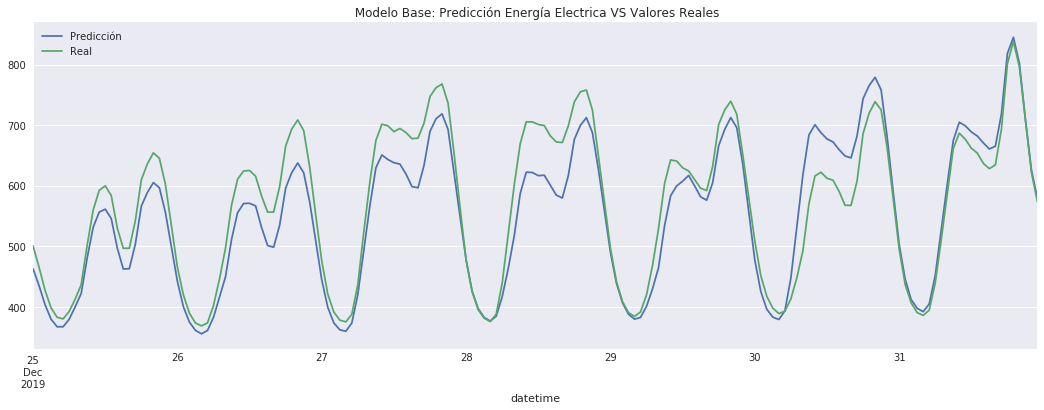

In [16]:
datos_m_base[-168:].plot()
prediccion_m_base.plot()
plt.legend(['Predicción', 'Real'])
plt.title(' Modelo Base: Predicción Energía Electrica VS Valores Reales');

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [18]:
def correlacion(y_test, pred):
    return np.corrcoef(y_test,pred)[0][1]

In [19]:
def bias(y_test, pred):
    return np.mean(pred - y_test)

In [89]:
rmse_base = np.sqrt(mean_squared_error(datos_m_base[-168:], prediccion_m_base))
r2_base = r2_score(datos_m_base[-168:], prediccion_m_base)
corr_base = correlacion(datos_m_base[-168:], prediccion_m_base)
BIAS_base = bias(datos_m_base[-168:], prediccion_m_base)

In [90]:
metricas_m_base = pd.DataFrame({'Modelo': 'M. Base','rmse': [rmse_base], 'r2': [r2_base],
                                'corr': [corr_base], 'BIAS': [BIAS_base]})
metricas_m_base

,Modelo,rmse,r2,corr,BIAS
0,M. Base,45.300074,0.856857,0.942085,18.827381


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [23]:
y = datos['demanda_electrica']

x = datos[['tmed', 'minutos_luz', 'festivo', 'hora',
           'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

In [24]:
y_train = y[:-168]
y_test = y[-168:]

x_train = x[:-168]
x_test = x[-168:]

In [28]:
x_train.sample(5)

,tmed,minutos_luz,festivo,hora,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
datetime,,,,,,,,,,,
2016-02-09 18:00,13.0,628,0,18,0,1,0,0,0,0,0
2018-10-12 14:00,20.1,677,1,14,0,0,0,0,1,0,0
2018-05-11 06:00,16.6,854,0,6,0,0,0,0,1,0,0
2017-12-20 11:00,9.5,562,0,11,0,0,1,0,0,0,0
2019-02-21 00:00,9.7,657,0,0,0,0,0,1,0,0,0


In [26]:
y_train.head()

datetime
2016-01-01 00:00    487.174
2016-01-01 01:00    459.223
2016-01-01 02:00    428.181
2016-01-01 03:00    400.044
2016-01-01 04:00    379.334
Freq: H, Name: demanda_electrica, dtype: float64

In [107]:
def rmse(y_test, pred):
    return np.sqrt(mean_squared_error(y_test, pred))

In [108]:
modelo_dtree = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"max_depth":np.arange(2,10),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring = make_scorer(rmse, greater_is_better = False))

In [109]:
modelo_dtree.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [10, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,


In [110]:
modelo_dtree.best_params_

{'max_depth': 9, 'min_samples_leaf': 10}

In [111]:
modelo_dtree.best_score_

-54.19587540437446

In [112]:
prediccion_m_dtree = pd.DataFrame()
prediccion_m_dtree['prediccion'] = modelo_dtree.predict(x_test)
prediccion_m_dtree.index = y_test.index

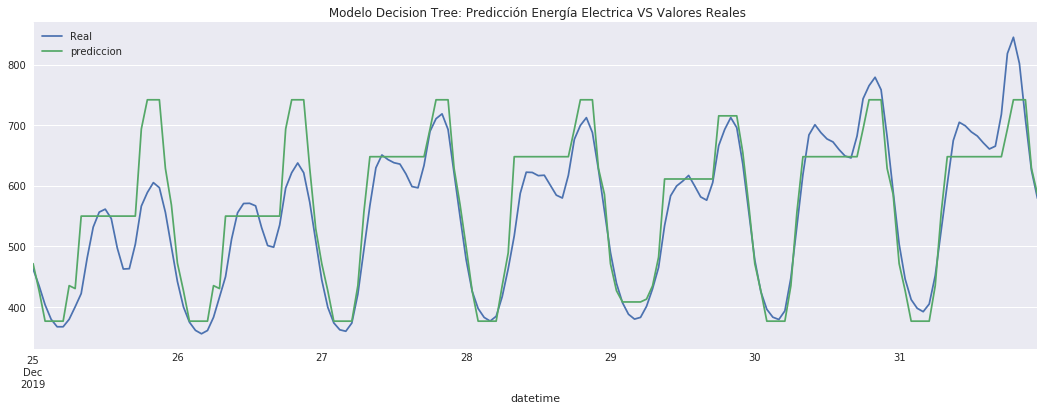

In [113]:
fig, ax = plt.subplots()
y_test.plot(ax = ax, label = 'Real')
prediccion_m_dtree.plot(ax = ax, label = 'Prediccion')
plt.legend()
plt.title(' Modelo Decision Tree: Predicción Energía Electrica VS Valores Reales');

In [114]:
rmse_dtree = np.sqrt(mean_squared_error(y_test, prediccion_m_dtree['prediccion']))
r2_dtree = r2_score(y_test, prediccion_m_dtree['prediccion'])
corr_dtree = correlacion(y_test, prediccion_m_dtree['prediccion'])
BIAS_dtree = bias(y_test, prediccion_m_dtree['prediccion'])

In [115]:
metricas_m_dtree = pd.DataFrame({'Modelo': 'M. Decision Tree','rmse': [rmse_dtree], 'r2': [r2_dtree],
                                'corr': [corr_dtree], 'BIAS': [BIAS_dtree]})
metricas_m_dtree

,Modelo,rmse,r2,corr,BIAS
0,M. Decision Tree,46.851951,0.846882,0.932964,16.362501


In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
modelo_rforest = GridSearchCV(RandomForestRegressor(n_estimators = 50),
                  param_grid={"max_depth":np.arange(2,10),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring = make_scorer(rmse, greater_is_better = False))

In [118]:
modelo_rforest.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 

In [119]:
modelo_rforest.best_params_

{'max_depth': 9, 'min_samples_leaf': 10}

In [120]:
modelo_rforest.best_score_

-50.59444469443603

In [131]:
prediccion_m_rforest = pd.DataFrame()
prediccion_m_rforest['prediccion'] = modelo_rforest.predict(x_test)
prediccion_m_rforest.index = y_test.index

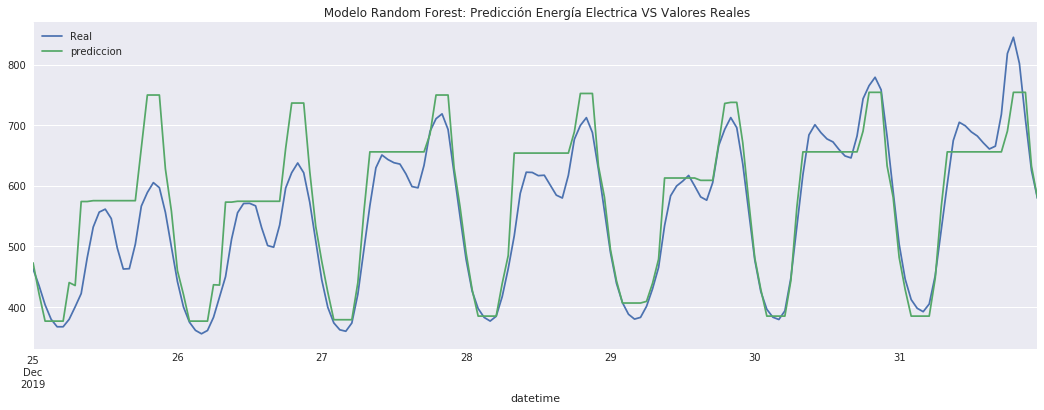

In [132]:
fig2, ax = plt.subplots()
y_test.plot(ax = ax, label = 'Real')
prediccion_m_rforest.plot(ax = ax, label = 'Prediccion')
plt.legend()
plt.title(' Modelo Random Forest: Predicción Energía Electrica VS Valores Reales');

In [133]:
rmse_rforest = np.sqrt(mean_squared_error(y_test, prediccion_m_rforest['prediccion']))
r2_rforest = r2_score(y_test, prediccion_m_rforest['prediccion'])
corr_rforest = correlacion(y_test, prediccion_m_rforest['prediccion'])
BIAS_rforest = bias(y_test, prediccion_m_rforest['prediccion'])

In [134]:
metricas_m_rforest = pd.DataFrame({'Modelo': 'M. Random Forest','rmse': [rmse_rforest], 'r2': [r2_rforest],
                                'corr': [corr_rforest], 'BIAS': [BIAS_rforest]})
metricas_m_rforest

,Modelo,rmse,r2,corr,BIAS
0,M. Random Forest,49.379774,0.829914,0.933538,22.712233


In [126]:
from sklearn.ensemble import GradientBoostingRegressor

In [127]:
modelo_gradientB = GridSearchCV(GradientBoostingRegressor(n_estimators=50),
                  param_grid={"max_depth":np.arange(2,10),
                             "learning_rate":np.arange(1,10)/10},
                  scoring = make_scorer(rmse, greater_is_better = False),
                  cv=5)

In [128]:
modelo_gradientB.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=50,
                                                 n_iter_...
                             

In [129]:
modelo_gradientB.best_params_

{'learning_rate': 0.1, 'max_depth': 8}

In [130]:
modelo_gradientB.best_score_

-41.64583298717404

In [135]:
prediccion_m_gradientB = pd.DataFrame()
prediccion_m_gradientB['prediccion'] = modelo_gradientB.predict(x_test)
prediccion_m_gradientB.index = y_test.index

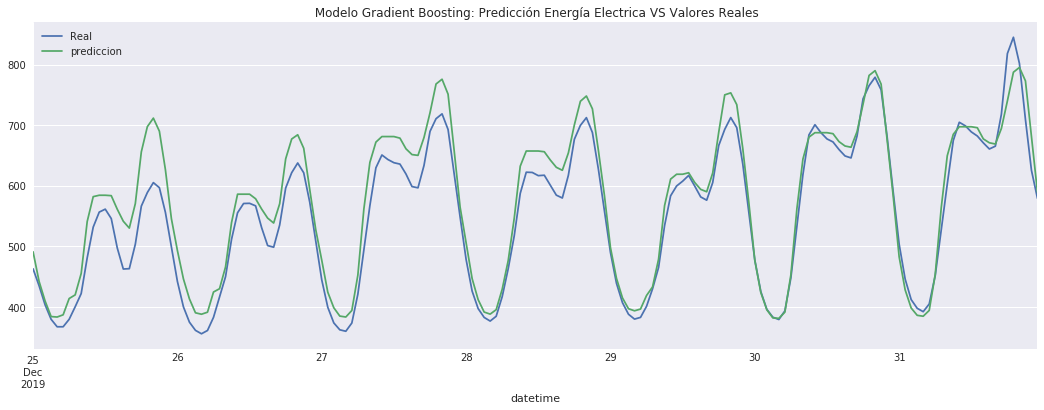

In [139]:
fig3, ax = plt.subplots()
y_test.plot(ax = ax, label = 'Real')
prediccion_m_gradientB.plot(ax = ax, label = 'Prediccion')
plt.legend()
plt.title(' Modelo Gradient Boosting: Predicción Energía Electrica VS Valores Reales');

In [140]:
rmse_gradientB = np.sqrt(mean_squared_error(y_test, prediccion_m_gradientB['prediccion']))
r2_gradientB = r2_score(y_test, prediccion_m_gradientB['prediccion'])
corr_gradientB = correlacion(y_test, prediccion_m_gradientB['prediccion'])
BIAS_gradientB = bias(y_test, prediccion_m_gradientB['prediccion'])

In [141]:
metricas_m_gradientB = pd.DataFrame({'Modelo': 'M. Gradient Boosting','rmse': [rmse_gradientB], 'r2': [r2_gradientB],
                                'corr': [corr_gradientB], 'BIAS': [BIAS_gradientB]})
metricas_m_gradientB

,Modelo,rmse,r2,corr,BIAS
0,M. Gradient Boosting,35.845656,0.910372,0.977808,25.018992


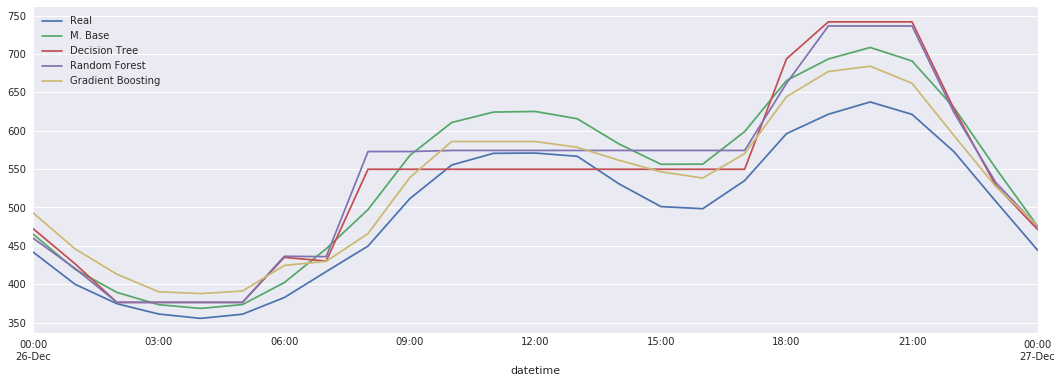

In [239]:
fig_h, ax = plt.subplots()
y_test.truncate('2019-12-26', '2019-12-27').plot(ax = ax)
prediccion_m_base.truncate('2019-12-26', '2019-12-27').plot( ax = ax)
prediccion_m_dtree.truncate('2019-12-26', '2019-12-27').plot( ax = ax)
prediccion_m_rforest.truncate('2019-12-26', '2019-12-27').plot( ax = ax)
prediccion_m_gradientB.truncate('2019-12-26', '2019-12-27').plot( ax = ax)
plt.legend(['Real', 'M. Base', 'Decision Tree', 'Random Forest', 'Gradient Boosting']);

In [270]:
comparacion_metricas = pd.concat([metricas_m_base, metricas_m_dtree, metricas_m_rforest, metricas_m_gradientB],
                                 ignore_index = True)
comparacion_metricas.index = comparacion_metricas['Modelo']
comparacion_metricas.drop('Modelo', axis = 1, inplace = True)
comparacion_metricas

,rmse,r2,corr,BIAS
Modelo,,,,
M. Base,45.300074,0.856857,0.942085,18.827381
M. Decision Tree,46.851951,0.846882,0.932964,16.362501
M. Random Forest,49.379774,0.829914,0.933538,22.712233
M. Gradient Boosting,35.845656,0.910372,0.977808,25.018992


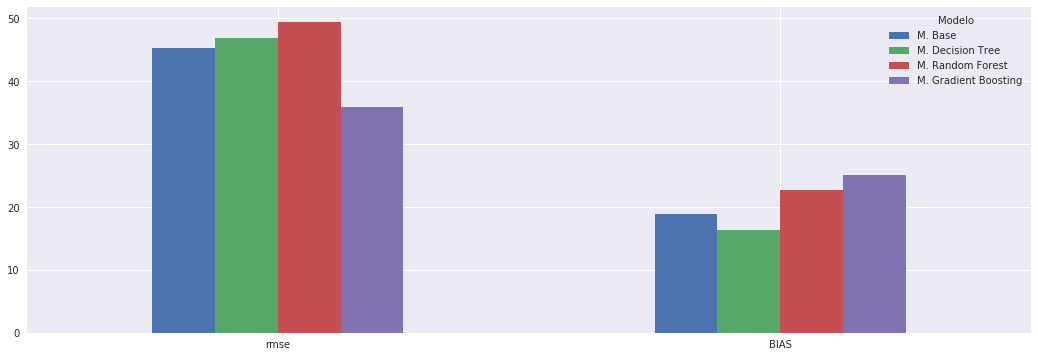

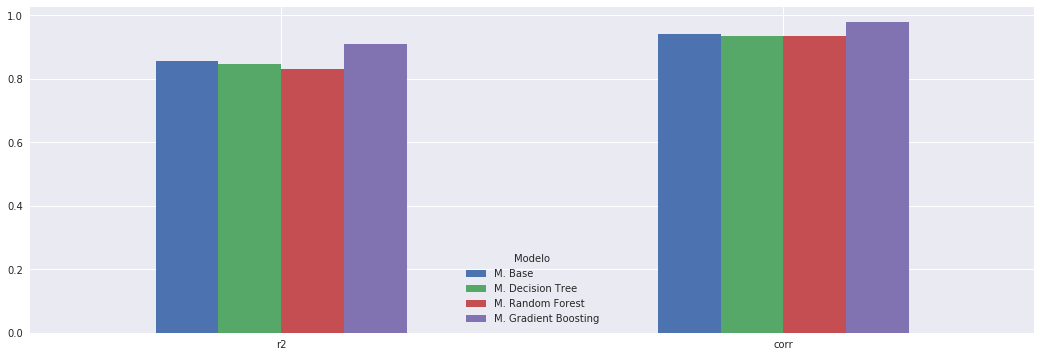

In [271]:
comparacion_metricas[['rmse', 'BIAS']].T.plot(kind = 'bar', rot = 0)
comparacion_metricas[['r2', 'corr']].T.plot(kind = 'bar', rot = 0);